In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
import random
%matplotlib inline

In [3]:
import torch

if torch.cuda.is_available():
    print("CUDA is available.")
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available.")


CUDA is not available.


In [1]:
# # Read in all the words
# words = open('data/names.txt', 'r').read().splitlines()
# print(words[:10])

# # Build the vocabulary of characters and mappings to/from integers
# chars = sorted(list(set(''.join(words))))
# stoi = {s: i + 1 for i, s in enumerate(chars)}
# stoi['.'] = 0
# itos = {i: s for s, i in stoi.items()}
# vocab_size = len(itos)

# print(f'Character to index mapping: {itos}')
# print(f'Vocabulary size: {vocab_size}')

# # Shuffle the words
# random.seed(42)
# random.shuffle(words)


In [1]:
# # Encode the words with '.' so the model can learn when a name should end
# def encode_words(words):
#     encoded = []
#     for w in words:
#         encoded.extend([stoi[ch] for ch in '.' + w ])
#     return encoded

# encoded = encode_words(words)
# encoded[:20]

In [191]:
# # Parameters for creating training and test sets
# n = len(encoded)
# n1 = int(0.8 * n)
# block_size = 8
# batch_size = 1

# train_seq = encoded[:n1]
# dev_seq = encoded[n1:]

In [192]:
# def create_pairs(seq, block_size):
#     X, Y = [], []
#     for i in range(0, len(seq) - block_size, block_size):
#         X.append(seq[i:i+block_size])
#         Y.append(seq[i+1:i+block_size+1])
#     X = torch.tensor(X, dtype=torch.float32)
#     Y = torch.tensor(Y, dtype=torch.float32)
#     return X, Y

# Xtr, Ytr = create_pairs(train_seq, block_size)
# Xdev, Ydev = create_pairs(dev_seq, block_size)

In [13]:
# # We are sure that we can pass in previous example's hidden layer
# print(Xtr[1])
# print(Ytr[1])
# print(Xtr[2])
# print(Ytr[2])
# print(Xtr[3])
# print(Ytr[3])
# print(f'Training data shapes - X: {Xtr.shape}, Y: {Ytr.shape}')
# print(f'Development data shapes - X: {Xdev.shape}, Y: {Ydev.shape}')

In [9]:
### ---------------------------------------------------------------------------------------------------------------------

In [14]:
# Read file
filename = 'data/validation.txt'
with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
    data = f.read()
    
# Get a list of the total characters
chars = list(set(data))

# Get the number of unique characters
vocab_size = len(chars)
data_size = len(data)

In [15]:
print('data has %d characters, %d unique.' % (data_size, vocab_size))

data has 19349777 characters, 101 unique.


In [16]:
# Build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(data))))
stoi = {s: i for i, s in enumerate(chars)}
itos = {i: s for s, i in stoi.items()}
vocab_size = len(itos)
print(f'Character to index mapping: {itos}')
print(f'Vocabulary size: {vocab_size}')

Character to index mapping: {0: '\n', 1: ' ', 2: '!', 3: '"', 4: '#', 5: '$', 6: '&', 7: "'", 8: '(', 9: ')', 10: '*', 11: '+', 12: ',', 13: '-', 14: '.', 15: '/', 16: '0', 17: '1', 18: '2', 19: '3', 20: '4', 21: '5', 22: '6', 23: '7', 24: '8', 25: '9', 26: ':', 27: ';', 28: '<', 29: '?', 30: 'A', 31: 'B', 32: 'C', 33: 'D', 34: 'E', 35: 'F', 36: 'G', 37: 'H', 38: 'I', 39: 'J', 40: 'K', 41: 'L', 42: 'M', 43: 'N', 44: 'O', 45: 'P', 46: 'Q', 47: 'R', 48: 'S', 49: 'T', 50: 'U', 51: 'V', 52: 'W', 53: 'X', 54: 'Y', 55: 'Z', 56: 'a', 57: 'b', 58: 'c', 59: 'd', 60: 'e', 61: 'f', 62: 'g', 63: 'h', 64: 'i', 65: 'j', 66: 'k', 67: 'l', 68: 'm', 69: 'n', 70: 'o', 71: 'p', 72: 'q', 73: 'r', 74: 's', 75: 't', 76: 'u', 77: 'v', 78: 'w', 79: 'x', 80: 'y', 81: 'z', 82: '¦', 83: '©', 84: '\xad', 85: '±', 86: '´', 87: 'Â', 88: 'Ã', 89: 'â', 90: 'ð', 91: 'œ', 92: 'Š', 93: 'Ÿ', 94: 'Ž', 95: '˜', 96: '“', 97: '”', 98: '‹', 99: '€', 100: '™'}
Vocabulary size: 101


In [17]:
# Parameters for creating training and test sets
n = len(data)
n1 = int(0.8 * n)
block_size = 40

train_seq = data[:n1]
dev_seq = data[n1:]
len(train_seq)

15479821

In [57]:
# train_seq[0:20]
# X = [stoi[ch] for ch in train_seq[0:20]]
# X
# X = torch.tensor(X, dtype=torch.float32)
# X.shape

In [18]:
# Create training and test set
def create_pairs(seq, block_size):
    X, Y = [], []
    # Iterate starting from 0, in orders of block_size, stopping just one block_size away to ensure consistency between X and Y
    for i in range(0, len(seq) - block_size, block_size):
        Xex = [stoi[ch] for ch in seq[i:i+block_size]]
        Yex = [stoi[ch] for ch in seq[i+1:i+block_size+1]]
        X.append(Xex)
        Y.append(Yex)
    X = torch.tensor(X, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.float32)
    return X, Y

Xtr, Ytr = create_pairs(train_seq, block_size)
Xdev, Ydev = create_pairs(dev_seq, block_size)

In [19]:
# Double check shape
Xtr.shape

torch.Size([386995, 40])

In [73]:
lr = 0.0005
# batch_size = 1
hidden_size = 300
time_steps = 40
input_size = 101
vocab_size

101

In [21]:
# def softmax(x):
#     e_x = torch.exp(x - torch.max(x, dim=1, keepdim=True)[0])
#     return e_x / torch.sum(e_x, dim=1, keepdim=True)

def softmax(x):
    e_x = torch.exp(x)
    return e_x / torch.sum(e_x, dim=1, keepdim=True)

In [22]:
# Initalize parameters
Fvh = torch.randn(vocab_size, hidden_size) * 0.01
i1vh = torch.randn(vocab_size, hidden_size) * 0.01
i2vh = torch.randn(vocab_size, hidden_size) * 0.01
Ovh = torch.randn(vocab_size, hidden_size) * 0.01

Fhh = torch.randn(hidden_size, hidden_size) * 0.01
i1hh = torch.randn(hidden_size, hidden_size) * 0.01
i2hh = torch.randn(hidden_size, hidden_size) * 0.01
Ohh = torch.randn(hidden_size, hidden_size) * 0.01

bias1 = torch.zeros(1, hidden_size)
bias2 = torch.zeros(1, hidden_size)
bias3 = torch.zeros(1, hidden_size)
bias4 = torch.zeros(1, hidden_size)

output_matrix = torch.randn(hidden_size, vocab_size) * 0.01
output_bias = torch.zeros(1, vocab_size)

X = {}
H = {}
C = {}
Ct = {}
preact1 = {}
preact2 = {}
preact3 = {}
preact4 = {}
act1 = {}
act2 = {}
act3 = {}
act4 = {}
logits = {}

In [25]:
def sample(hprev, cprev, seed_ix, n):
    # Create one hot vector based on input seed_ix
    x = torch.zeros(1, vocab_size)
    x[0, seed_ix] = 1
    ixes = []

    for t in range(n):
        # Forward propogation again
        preact1 = x @ Fvh + hprev @ Fhh + bias1 # (1, 27) @ (27, 30) + (1, 30) @ (30, 30) + (30) = (1, 30)
        preact2 = x  @ i1vh + hprev  @ i1hh * bias2 # (32, 27) @ (27, 30) + (32, 30) @ (30, 30) + (30)
        preact3 = x  @ i2vh + hprev  @ i2hh + bias3 # (32, 27) @ (27, 30) + (32, 30) @ (30, 30) + (30)
        preact4 = x  @ Ovh + hprev  @ Ohh + bias4 # (32, 27) @ (27, 30) + (32, 30) @ (30, 30) + (30)
        act1 = torch.sigmoid(preact1) # (1, 30)
        act2 = torch.sigmoid(preact2) # (1, 30)
        act3 = torch.tanh(preact3) # (1, 30)
        act4 = torch.sigmoid(preact4) # (1, 30)
        C = act1 * cprev  + act2  * act3  # (1, 30)
        Ct = torch.tanh(C) # (1, 30)
        H = Ct * act4  # (1, 30)          
        logits = H  @ output_matrix + output_bias # (1, 30) @ (30, 27) + (1, 27) = (1, 27)

        # Probability
        counts = logits.exp()
        counts_sum = counts.sum(1, keepdims=True)
        counts_sum_inv = counts_sum**-1
        probs = counts * counts_sum_inv

        # Sample from distribution
        ix = torch.multinomial(probs, num_samples=1).item()
        if (ix == 0):
            break
        ixes.append(ix)

        # Update our parameters
        x = torch.zeros(1, vocab_size)
        x[0, ix] = 1
        hprev = H
        cprev = C
    return ixes

In [78]:
max_iterations = 0
max_iterations_limit = 100000000000000

while max_iterations < max_iterations_limit:
    
    # Looping over batches (each batch is just a single row)
    for batch_num in range(Xtr.shape[0]):

        # Initial cell state and hidden state and loss
        if (max_iterations == 0):
            H[-1] = torch.zeros(1, hidden_size)
            C[-1] = torch.zeros(1, hidden_size)
        loss = 0   
        
        # Get a batch of random numbers into correct shape
        # Get corresponding row from training set
        Xb = Xtr[batch_num, :].to(torch.long) # (1, 8)
        # Conver to one hot vectors
        Xb = F.one_hot(Xb, vocab_size).float() # (8, 27)
        # Get corresponding row from training set
        Yb = Ytr[batch_num].to(torch.long) # (8, 1)
        
### --------------------------------------------------------------------------------------------------------------        
        # Forward pass over all time steps
        for t in range(time_steps):
            # Pass through weight matrices (last hidden activations and current time step's input)
            # This means that there is one less hidden layer than the number of activations inputted
            # Xb[t] gets a single row from the training set
            preact1[t] = Xb[t] @ Fvh + H[t-1] @ Fhh + bias1 # (1, 27) @ (27, 30) + (1, 30) @ (30, 30) + (30) = (1, 30)
            preact2[t] = Xb[t]  @ i1vh + H[t-1]  @ i1hh * bias2 # (32, 27) @ (27, 30) + (32, 30) @ (30, 30) + (30)
            preact3[t] = Xb[t]  @ i2vh + H[t-1]  @ i2hh + bias3 # (32, 27) @ (27, 30) + (32, 30) @ (30, 30) + (30)
            preact4[t] = Xb[t]  @ Ovh + H[t-1]  @ Ohh + bias4 # (32, 27) @ (27, 30) + (32, 30) @ (30, 30) + (30)

            # Compute activations
            act1[t] = torch.sigmoid(preact1[t]) # (1, 30)
            act2[t] = torch.sigmoid(preact2[t]) # (1, 30)
            act3[t] = torch.tanh(preact3[t]) # (1, 30)
            act4[t] = torch.sigmoid(preact4[t]) # (1, 30)
            
            # Forget gate * previous cell state + i1 gate * i2 gate
            C[t] = act1[t] * C[t-1]  + act2[t]  * act3[t]  # (1, 30)
            Ct[t] = torch.tanh(C[t]) # (1, 30)
            # Compute current time step's hidden output to be passed onto the next time step
            H[t] = Ct[t] * act4[t]  # (1, 30)          

            # Logits
            logits[t] = H[t]  @ output_matrix + output_bias # (1, 30) @ (30, 27) + (1, 27) = (1, 27)

            # Cross entropy
            counts = logits[t].exp()
            counts_sum = counts.sum(1, keepdims=True)
            counts_sum_inv = counts_sum**-1
            probs = counts * counts_sum_inv
            logprobs = probs.log()
            loss += -logprobs[0, Yb[t]]

        # Continue the sequence for time step -1 of the next input sequence by passing it on
        H[-1] = H[time_steps - 1]
        C[-1] = C[time_steps - 1]

        # Print out the loss occasionally, and sample from the model occassionally
        if max_iterations % 1000 == 0:
            print("loss: ", loss)
            print("iteration: ", max_iterations)
            # Pass in the last hidden layer, and last cell state
            # Pass in the index which can be referenced through itos
            for i in range(3):
                sample_ix = sample(H[-1], C[-1], 0, 200)
                txt = ''.join(itos[ix] for ix in sample_ix)
                print('----\n %s \n----' % (txt,))

        # Increment max iterations (each training example means one iteration)
        max_iterations += 1
        
        if max_iterations >= max_iterations_limit:
            break

### ---------------------------------------------------------------------------------------------------------------
        # Backward pass
        # Set to zeros initially
        dHnext = torch.zeros_like(H[0])
        dCnext = torch.zeros_like(C[0])
        
        dFvh = torch.zeros(vocab_size, hidden_size)
        di1vh = torch.zeros(vocab_size, hidden_size)
        di2vh = torch.zeros(vocab_size, hidden_size)
        dOvh = torch.zeros(vocab_size, hidden_size)
        
        dFhh = torch.zeros(hidden_size, hidden_size)
        di1hh = torch.zeros(hidden_size, hidden_size)
        di2hh = torch.zeros(hidden_size, hidden_size)
        dOhh = torch.zeros(hidden_size, hidden_size)
        
        dbias1 = torch.zeros(1, hidden_size)
        dbias2 = torch.zeros(1, hidden_size)
        dbias3 = torch.zeros(1, hidden_size)
        dbias4 = torch.zeros(1, hidden_size)
        
        doutput_matrix = torch.zeros(hidden_size, vocab_size)
        doutput_bias = torch.zeros(1, vocab_size)

        for t in reversed(range(time_steps)):
            # Backpropogate cross entropy
            dlogits = F.softmax(logits[t], 1)
            dlogits [0, Yb[t]] -= 1
            
            # Backpropogate output matrix and its bias
            doutput_matrix +=  H[t].T @ dlogits # (30, 1) @ (1, 27) = (30, 27)
            doutput_bias += dlogits # (1, 27)
            
            # Backpropogate into H (two derivatives due to 2 dependencies)
            dH = dlogits  @ output_matrix.T + dHnext # (1, 27) @ (27, 30) + (1, 30) = (1, 30)
            
            # Backpropogate dact4 (output gate activations)
            dact4  = dH  * Ct[t]  # (1, 30) * (1, 30) = (1, 30)
            
            # Backpropogate dC (current cell state and also two derivatives)
            dC = dH * act4[t] * (1 - torch.tanh(C[t]) ** 2) + dCnext # (1, 30) * (1, 30) * (1, 30) = (1, 30)
            
            ### Backpropogate act1 and previous cell state
            # Forget gate activations
            # dCnext activations
            dact1 = dC * C[t-1] # (1, 30) * (1, 30) = (1, 30)
            dCnext = dC * act1[t]
            
            # Backpropogate i1 activations
            dact2  = dC  * act3[t] # (1, 27)
            
            # Backpropogate i2 activations
            dact3  = dC  * act2[t]  # (1, 27)
            
            # Backpropogate all preactivations
            dpreact1 = dact1 * act1[t] * (1 - act1[t])
            dpreact2 = dact2 * act2[t] * (1 - act2[t])
            dpreact3 = dact3 * (1 - torch.tanh(preact3[t]) ** 2)
            dpreact4 = dact4 * act4[t] * (1 - act4[t])
            
            # Backpropogate gates
            dFvh += Xb[t].reshape(vocab_size, 1) @ dpreact1  # (27, 1) (1, 30) = (27, 30)
            dFhh += H[t-1].reshape(hidden_size, 1) @ dpreact1  # (30, 1) (1, 30) = (30, 30)
            dbias1 += dpreact1
            
            di1vh += Xb[t].reshape(vocab_size, 1) @ dpreact2 # (27, 1) (1, 30) = (27, 30)
            di1hh += H[t-1].reshape(hidden_size, 1) @ dpreact2 # (30, 1) (1, 30) = (30, 30)
            dbias2 += dpreact2
            
            di2vh += Xb[t].reshape(vocab_size, 1) @ dpreact3 # (27, 1) (1, 30) = (27, 30)
            di2hh += H[t-1].reshape(hidden_size, 1) @ dpreact3 # (30, 1) (1, 30) = (30, 30)
            dbias3 += dpreact3
            
            dOvh += Xb[t].reshape(vocab_size, 1) @ dpreact4 # (27, 1) (1, 30) = (27, 30)
            dOhh += H[t-1].reshape(hidden_size, 1) @ dpreact4 # (30, 1) (1, 30) = (30, 30)
            dbias4 += dpreact4
            
            # Backpropogate dHnext
            # (1, 30) @ (30, 30) ...  = (1, 30)
            dHnext  = dpreact1  @ Fhh.T + dpreact2  @ i1hh.T + dpreact3  @ i2hh.T + dpreact4  @ Ohh.T

        torch.nn.utils.clip_grad_norm_([dFvh, di1vh, di2vh, dOvh, dFhh, di1hh, di2hh, dOhh, dbias1, dbias2, dbias3, dbias4, doutput_matrix, doutput_bias], max_norm=1.0)

### ------------------------------------------------------------------------------------------------------------------
    
        # Update parameters using gradients
        Fvh -= lr * dFvh
        i1vh -= lr * di1vh
        i2vh -= lr * di2vh
        Ovh -= lr * dOvh

        Fhh -= lr * dFhh
        i1hh -= lr * di1hh
        i2hh -= lr * di2hh
        Ohh -= lr * dOhh
        
        bias1 -= lr * dbias1
        bias2 -= lr * dbias2
        bias3 -= lr * dbias3
        bias4 -= lr * dbias4

        output_matrix -= lr * doutput_matrix
        output_bias -= lr * doutput_bias

    

loss:  tensor(62.8172)
iteration:  0
----
 yaw how. She sut of his little rols out." 
----
----
 in and flew by the hampy pash. I'm playing with scareding out. She tarks, scared her there. It was so prouding of the peak for larenly. 
----
----
 in them. His mister saw a big heat and from the head for like a p sty. He swaited one heaster and in the fase. One day, a ride spitcered looking to it. 
----
loss:  tensor(17.0487)
iteration:  1000
----
 "This friends said coung to exciting the little fillen with a little said holding. He was excited. 
----
----
  down, brights. She smiled and helped the compy. Timmy said, ""I am was visit was."" so time. Tim anst eater yas laughter was in the beach. The voice of the cookles asked it home. He said, ""The car," 
----
----
  of their. His mom kept her a big smeling in the candyochet't corn. Everyone became friends." 
----
loss:  tensor(38.0863)
iteration:  2000
----
 side, Maxking, Finna looked around, for his mom, betoniggether wishever asked all

KeyboardInterrupt: 

In [80]:
import os

model_params = {
    'Fvh': Fvh,
    'i1vh': i1vh,
    'i2vh': i2vh,
    'Ovh': Ovh,
    'Fhh': Fhh,
    'i1hh': i1hh,
    'i2hh': i2hh,
    'Ohh': Ohh,
    'bias1': bias1,
    'bias2': bias2,
    'bias3': bias3,
    'bias4': bias4,
    'output_matrix': output_matrix,
    'output_bias': output_bias
}

# Get the current working directory
current_directory = os.getcwd()
model_path = os.path.join(current_directory, "model_params.pth")

# Save the model parameters
torch.save(model_params, model_path)

print(f"Model parameters saved to {model_path}")


Model parameters saved to C:\Users\admin\Desktop\vscode\model_params.pth


In [81]:
print(stoi)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '&': 6, "'": 7, '(': 8, ')': 9, '*': 10, '+': 11, ',': 12, '-': 13, '.': 14, '/': 15, '0': 16, '1': 17, '2': 18, '3': 19, '4': 20, '5': 21, '6': 22, '7': 23, '8': 24, '9': 25, ':': 26, ';': 27, '<': 28, '?': 29, 'A': 30, 'B': 31, 'C': 32, 'D': 33, 'E': 34, 'F': 35, 'G': 36, 'H': 37, 'I': 38, 'J': 39, 'K': 40, 'L': 41, 'M': 42, 'N': 43, 'O': 44, 'P': 45, 'Q': 46, 'R': 47, 'S': 48, 'T': 49, 'U': 50, 'V': 51, 'W': 52, 'X': 53, 'Y': 54, 'Z': 55, 'a': 56, 'b': 57, 'c': 58, 'd': 59, 'e': 60, 'f': 61, 'g': 62, 'h': 63, 'i': 64, 'j': 65, 'k': 66, 'l': 67, 'm': 68, 'n': 69, 'o': 70, 'p': 71, 'q': 72, 'r': 73, 's': 74, 't': 75, 'u': 76, 'v': 77, 'w': 78, 'x': 79, 'y': 80, 'z': 81, '¦': 82, '©': 83, '\xad': 84, '±': 85, '´': 86, 'Â': 87, 'Ã': 88, 'â': 89, 'ð': 90, 'œ': 91, 'Š': 92, 'Ÿ': 93, 'Ž': 94, '˜': 95, '“': 96, '”': 97, '‹': 98, '€': 99, '™': 100}


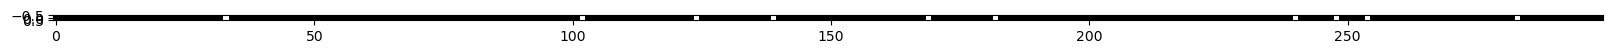

In [82]:
# Saturated activations
plt.figure(figsize = (20,50))
plt.imshow(act3[6].abs() > 0.99, cmap = 'gray', interpolation = 'nearest')

activation  0  --------------------------------------------------
time step 0
mean: 0.40503183007240295
std: 0.15782271325588226
saturated: 0.0%
time step 1
mean: 0.3891177177429199
std: 0.14106474816799164
saturated: 0.0%
time step 2
mean: 0.4384293556213379
std: 0.14347386360168457
saturated: 0.0%
time step 3
mean: 0.46228817105293274
std: 0.16790252923965454
saturated: 0.33333334140479565%
time step 4
mean: 0.4292035400867462
std: 0.14903315901756287
saturated: 0.0%
time step 5
mean: 0.42285266518592834
std: 0.15641193091869354
saturated: 0.33333334140479565%
time step 6
mean: 0.4341072738170624
std: 0.14086630940437317
saturated: 0.0%
time step 7
mean: 0.4367477297782898
std: 0.13186030089855194
saturated: 0.0%
time step 8
mean: 0.4393734335899353
std: 0.1439947932958603
saturated: 0.0%
time step 9
mean: 0.4061916470527649
std: 0.14904183149337769
saturated: 0.0%
time step 10
mean: 0.3825284540653229
std: 0.14943087100982666
saturated: 0.0%
time step 11
mean: 0.3955553472042084
std

C:\Users\admin\AppData\Local\Temp\ipykernel_26924\2616859262.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


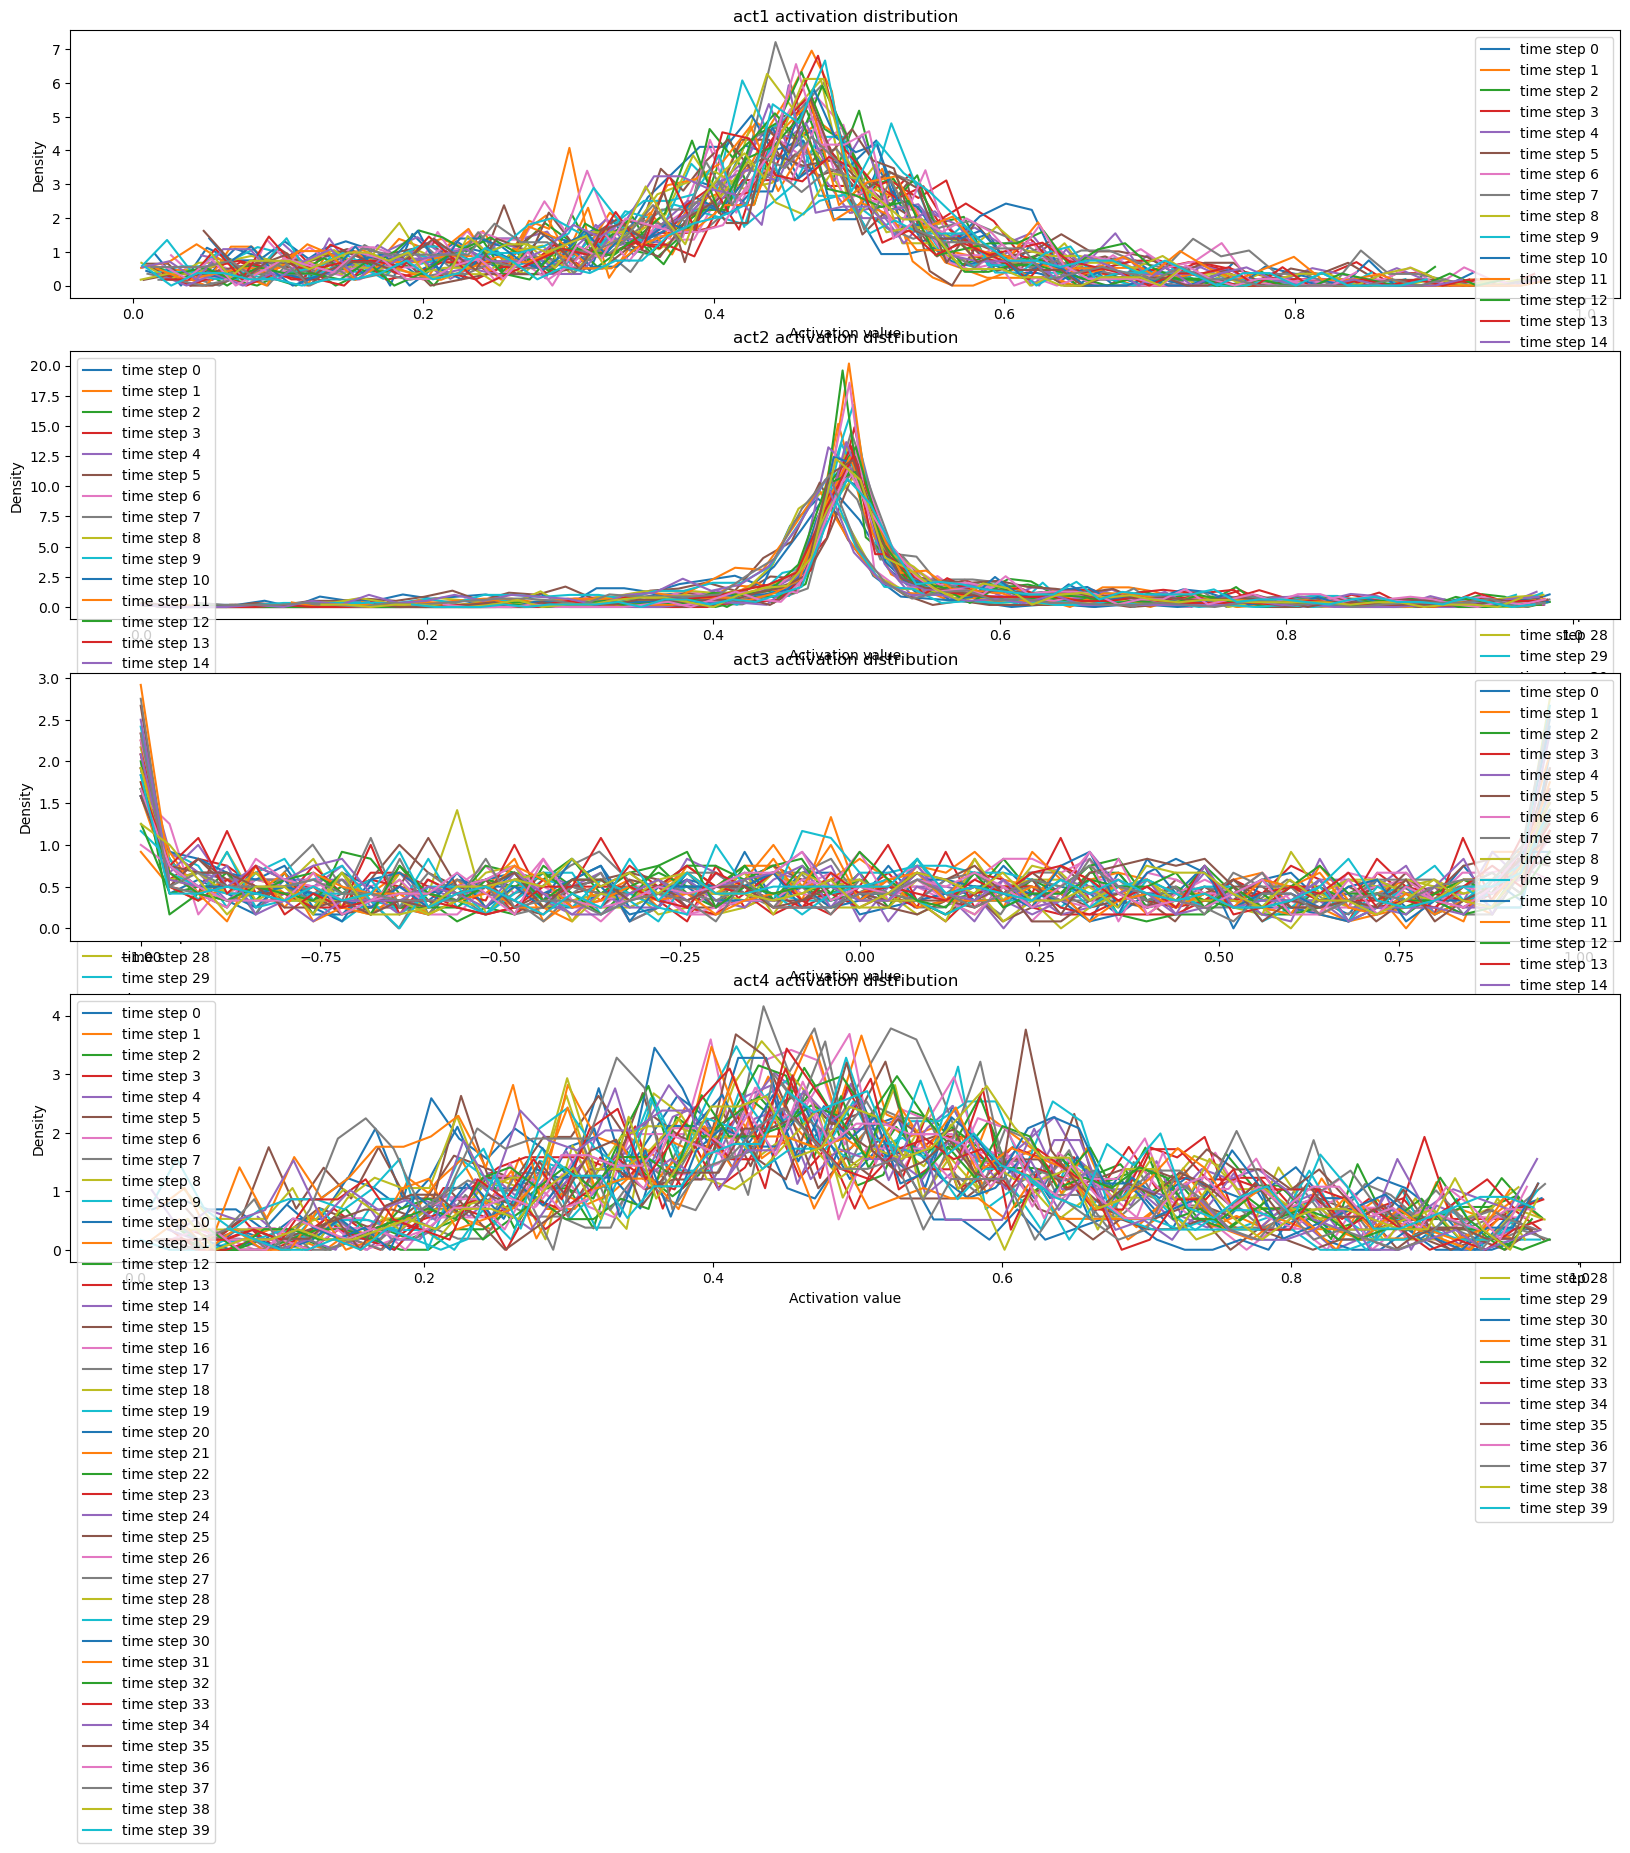

In [83]:
# Assuming act1, act2, act3, and act4 are your activations tensors
activations = [act1, act2, act3, act4]
activation_names = ["act1", "act2", "act3", "act4"]

plt.figure(figsize=(20, 16))  # Width and height of the plot

for i, act in enumerate(activations):
    print("activation ", i, " --------------------------------------------------")
    plt.subplot(4, 1, i+1)  # Create a subplot for each set of activations
    legends = []
    for t in range(time_steps):  # Loop over all time steps
        activations_at_t = act[t]
        print(f"time step {t}")
        print(f"mean: {activations_at_t.mean().item()}")
        print(f"std: {activations_at_t.std().item()}")
        print(f"saturated: {(activations_at_t.abs() > 0.97).float().mean().item()*100}%")
        
        hy, hx = torch.histogram(activations_at_t.view(-1), bins=50, density=True)
        plt.plot(hx[:-1].detach().cpu(), hy.detach().cpu())
        legends.append(f'time step {t}')
    
    plt.legend(legends)
    plt.title(f'{activation_names[i]} activation distribution')
    plt.xlabel('Activation value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

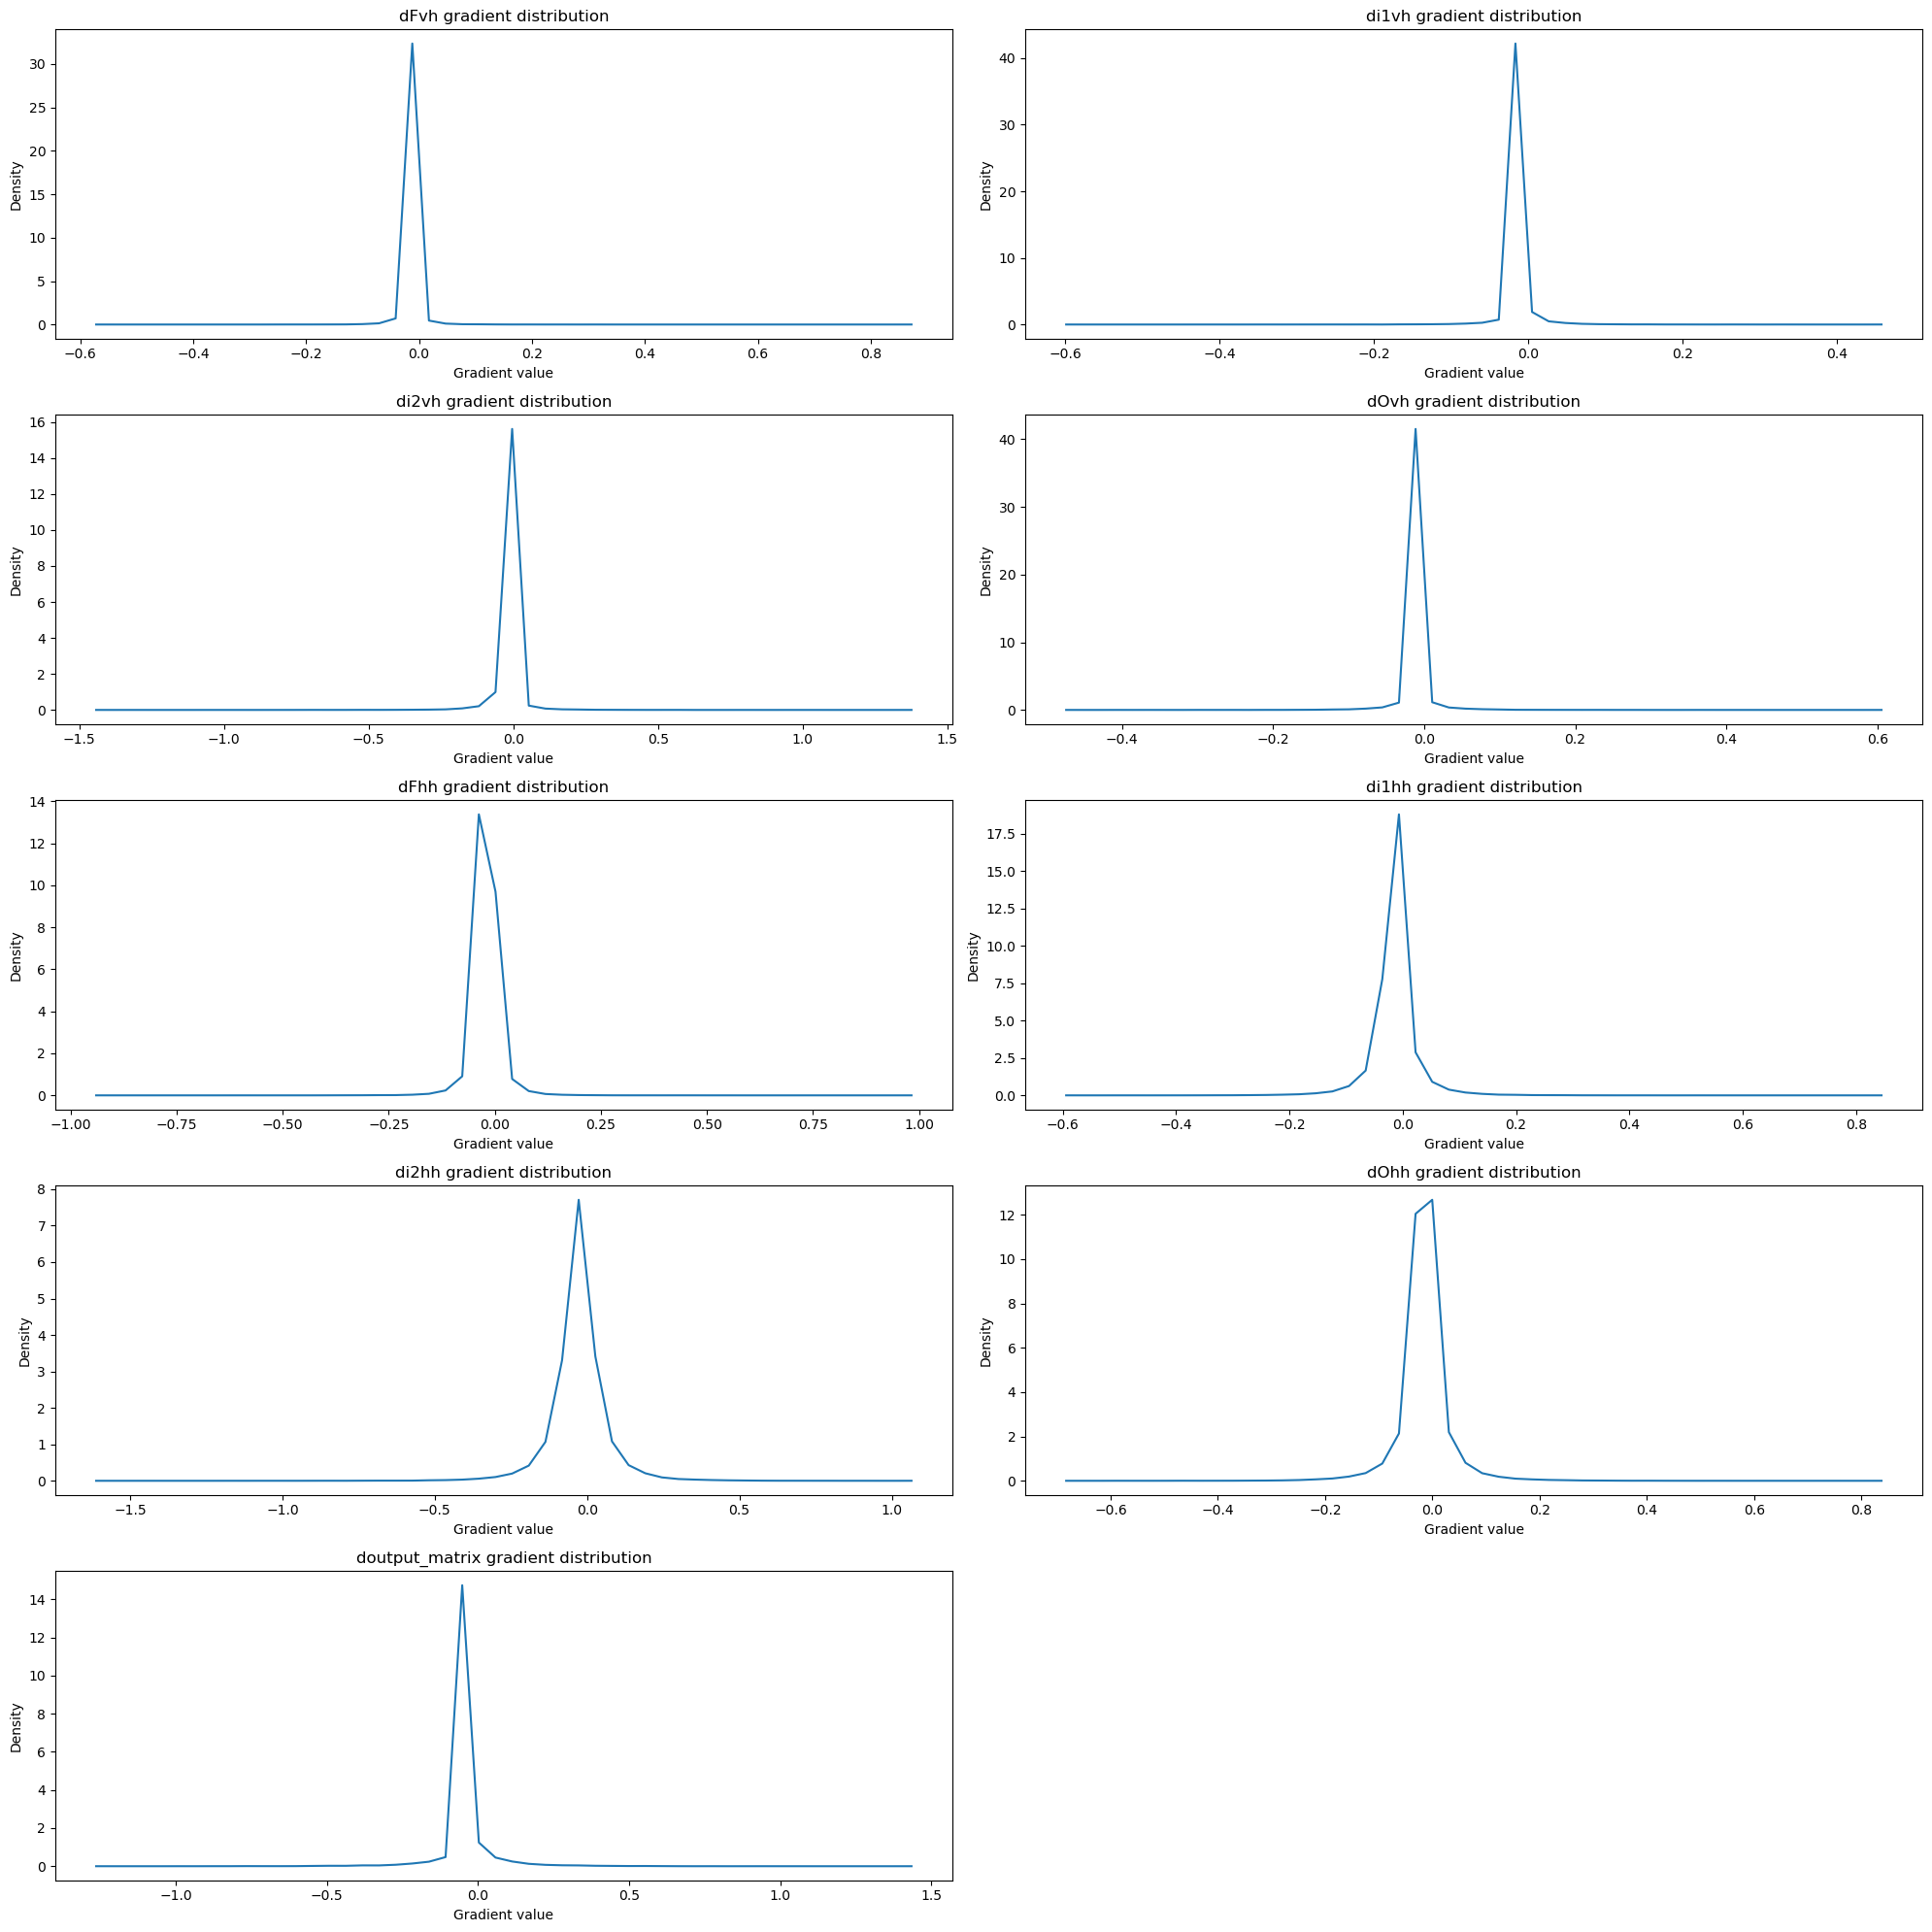

In [84]:
# Assuming the gradients dFvh, di1vh, di2vh, dOvh, dFhh, di1hh, di2hh, dOhh, and doutput_matrix are defined as tensors
gradients = [dFvh, di1vh, di2vh, dOvh, dFhh, di1hh, di2hh, dOhh, doutput_matrix]
gradient_names = ["dFvh", "di1vh", "di2vh", "dOvh", "dFhh", "di1hh", "di2hh", "dOhh", "doutput_matrix"]

plt.figure(figsize=(20, 20))  # Adjust the size as needed

for i, grad in enumerate(gradients):
    plt.subplot(5, 2, i+1)  # Create a subplot for each gradient, arranging in 5 rows and 2 columns
    grad_flattened = grad.view(-1)  # Flatten the gradient tensor to 1D
    hy, hx = torch.histogram(grad_flattened, bins=50, density=True)
    plt.plot(hx[:-1].detach().cpu(), hy.detach().cpu())
    plt.title(f'{gradient_names[i]} gradient distribution')
    plt.xlabel('Gradient value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


Fvh | mean: 0.000074 | std: 1.301840e-02 | grad:data ratio: 1.245512e-01
i1vh | mean: 0.000096 | std: 1.768972e-02 | grad:data ratio: 1.834837e-01
i2vh | mean: -0.000442 | std: 4.242433e-02 | grad:data ratio: 1.217079e-01
Ovh | mean: 0.000080 | std: 1.903532e-02 | grad:data ratio: 1.632713e-01
Fhh | mean: -0.000018 | std: 3.204015e-02 | grad:data ratio: 3.985247e-01
i1hh | mean: -0.000114 | std: 3.907140e-02 | grad:data ratio: 3.063181e-01
i2hh | mean: -0.000213 | std: 9.227825e-02 | grad:data ratio: 6.071383e-01
Ohh | mean: -0.000017 | std: 4.557181e-02 | grad:data ratio: 4.363591e-01
output_matrix | mean: 0.000000 | std: 7.641405e-02 | grad:data ratio: 2.609917e-01


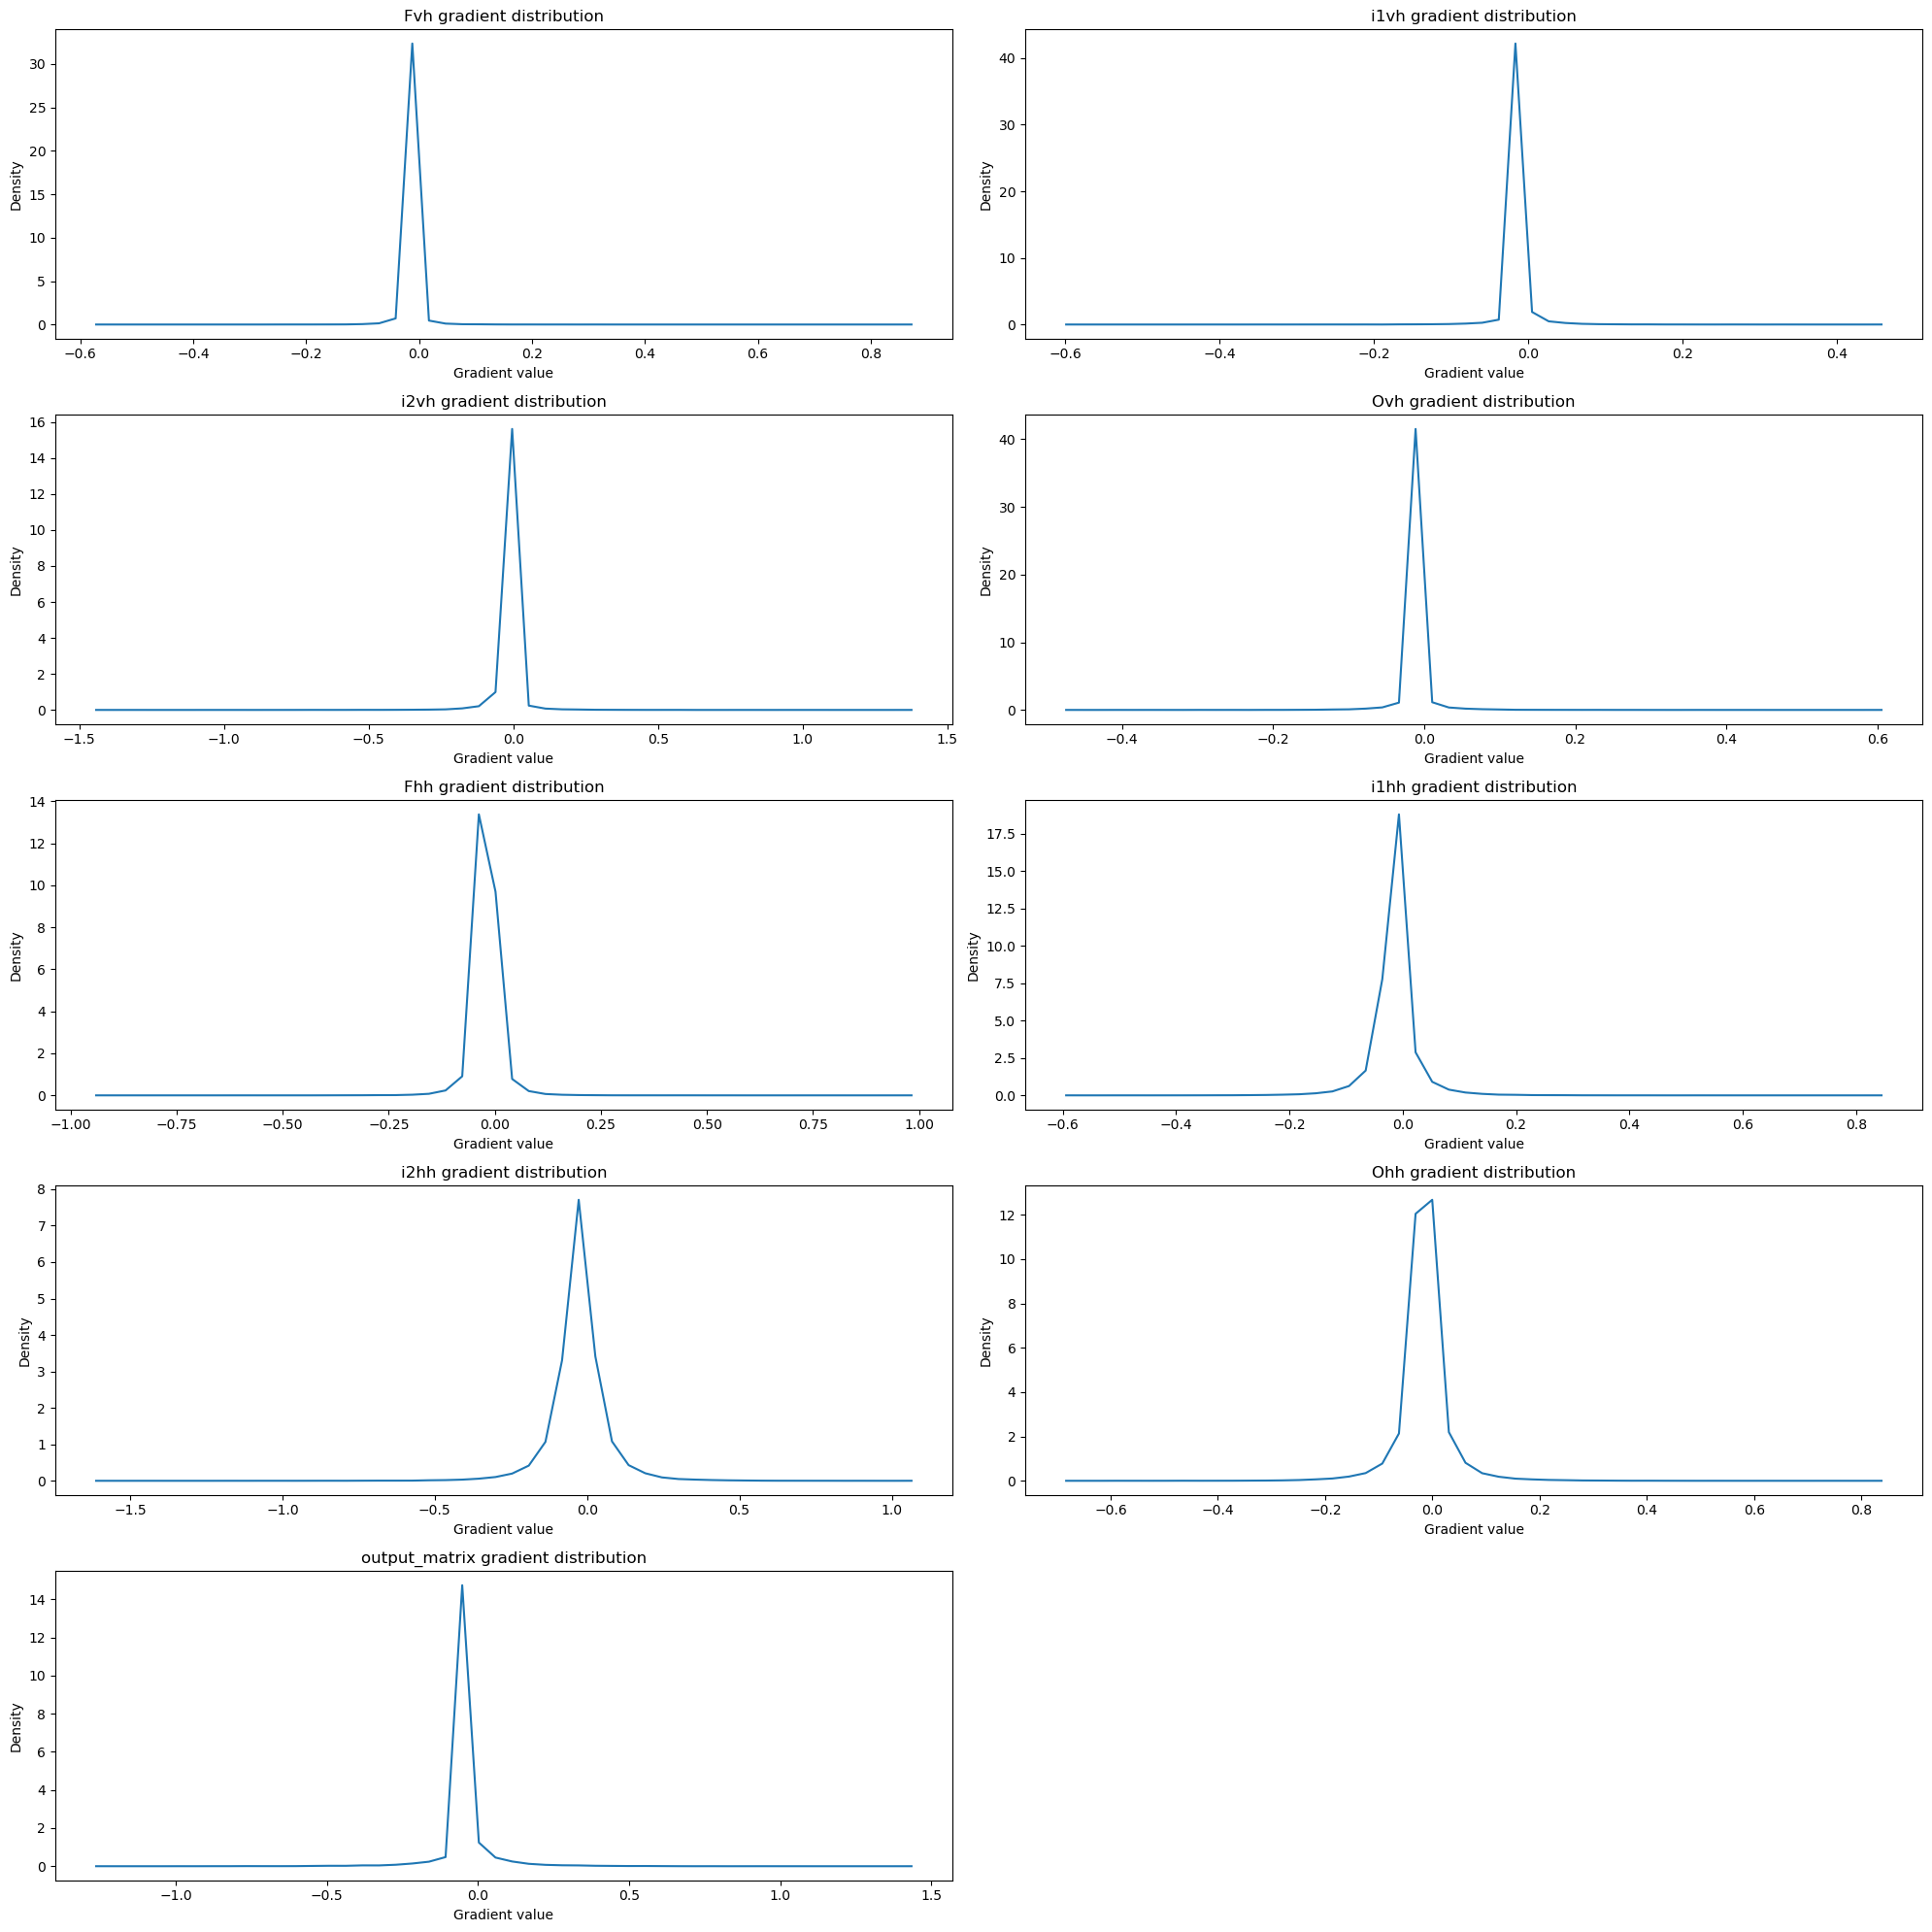

In [85]:
# Assuming the gradients dFvh, di1vh, di2vh, dOvh, dFhh, di1hh, di2hh, dOhh, and doutput_matrix are defined as tensors
weights = [Fvh, i1vh, i2vh, Ovh, Fhh, i1hh, i2hh, Ohh, output_matrix]
weight_names = ["Fvh", "i1vh", "i2vh", "Ovh", "Fhh", "i1hh", "i2hh", "Ohh", "output_matrix"]

# Define gradients corresponding to the weights
gradients = [dFvh, di1vh, di2vh, dOvh, dFhh, di1hh, di2hh, dOhh, doutput_matrix]

plt.figure(figsize=(20, 20))  # Adjust the size as needed

for i, (weight, grad) in enumerate(zip(weights, gradients)):
    plt.subplot(5, 2, i+1)  # Create a subplot for each gradient, arranging in 5 rows and 2 columns
    grad_flattened = grad.view(-1)  # Flatten the gradient tensor to 1D
    hy, hx = torch.histogram(grad_flattened, bins=50, density=True)
    plt.plot(hx[:-1].detach().cpu(), hy.detach().cpu())
    plt.title(f'{weight_names[i]} gradient distribution')
    plt.xlabel('Gradient value')
    plt.ylabel('Density')
    print(f'{weight_names[i]} | mean: {grad.mean().item():.6f} | std: {grad.std().item():.6e} | grad:data ratio: {grad.std().item() / weight.std().item():.6e}')

plt.tight_layout()
plt.show()


In [86]:
def compute_loss(X, Y, num_batches):
    H = [torch.zeros(1, hidden_size)]
    C = [torch.zeros(1, hidden_size)]
    total_loss = 0
    for batch_num in range(min(num_batches, X.shape[0])):
        Xb = X[batch_num, :].to(torch.long)
        Xb = F.one_hot(Xb, vocab_size).float()
        Yb = Y[batch_num].to(torch.long)
        loss = 0
        for t in range(time_steps):
            preact1 = Xb[t] @ Fvh + H[t-1] @ Fhh + bias1
            preact2 = Xb[t] @ i1vh + H[t-1] @ i1hh + bias2
            preact3 = Xb[t] @ i2vh + H[t-1] @ i2hh + bias3
            preact4 = Xb[t] @ Ovh + H[t-1] @ Ohh + bias4
            act1 = torch.sigmoid(preact1)
            act2 = torch.sigmoid(preact2)
            act3 = torch.tanh(preact3)
            act4 = torch.sigmoid(preact4)
            C.append(act1 * C[t-1] + act2 * act3)
            Ct = torch.tanh(C[t])
            H.append(Ct * act4)
            logits = H[t] @ output_matrix + output_bias
            logprobs = F.log_softmax(logits, dim=1)
            loss += F.nll_loss(logprobs, Yb[t].unsqueeze(0))
        total_loss += loss.item()
    return total_loss / min(num_batches, X.shape[0])

# Compute training and validation losses
num_batches = 100  # Number of batches to consider for loss computation
train_loss = compute_loss(Xtr, Ytr, num_batches)
val_loss = compute_loss(Xdev, Ydev, num_batches)

print(f"Training Loss: {train_loss}")
print(f"Validation Loss: {val_loss}")

Training Loss: 296.2544195556641
Validation Loss: 318.4068717956543


In [88]:
# Sampling from distribution
hprev = torch.zeros(1, hidden_size)
cprev = torch.zeros(1, hidden_size)
num_samples = 10
for i in range(num_samples):
    sample_ix = sample(hprev, cprev, 0, 100)
    txt = ''.join(itos[ix] for ix in sample_ix)
    print('----\n %s \n----' % (txt,))


----
  up. Do something leare found boont for Timmy who was never Lily. He gave him up, Kittenk the house  
----
----
 she was so bucly to hug. She had a box that she had so much fun. The time begrateves that he ever ev 
----
----
  
----
----
 started the mook pipe. He also believed to eat it with his warm of one. He asked her floor in the ad 
----
----
 Len and said that'res refusted that it was a greet furI. She sucgents that she went buss about any o 
----
----
  
----
----
 Yow he didn't like the sweep. They would borg as he was very! Juck sunged it but that it went shocki 
----
----
 Jant dressive. When they all the sun chaself from maccides and hard that relie volcone in the farly. 
----
----
  
----
----
 "" Mommy gra brave hore, sRuice surt and As the round, but Crive said he could very saf. He was raci 
----
